In [85]:
import pandas as pd
import numpy as np


In [86]:
users_data=pd.read_csv('users.csv')
users_data.head()

,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at
0,Premalatha-success,Premalatha T,AI CONSULTANT/DATA SCIENTIST/TRAINER/FREELANCE...,Chennai,NaN,NaN,Data Science Fanatic,137,2035,1,2020-01-13T14:41:16Z
1,anitaa1990,Anitaa Murthy,NaN,Chennai,murthyanitaa@gmail.com,True,Android Developer/iOS Developer,38,1945,12,2016-10-04T05:03:44Z
2,codewithMUHILAN,ＭＵＨＩＬＡＮ,NaN,"chennai, india",NaN,NaN,Love with my Passion...❤️,5,1838,0,2023-07-10T05:30:12Z
3,sygops,SYGK,NaN,Chennai,sygops@gmail.com,NaN,Do what you feel in your heart to be right. Yo...,113,1815,10219,2015-12-30T12:32:19Z
4,Spikeysanju,Sanju S,THISUXHQ,"Chennai, India",spikeysanju98@gmail.com,True,Designer Founder @THISUXHQ | Google Developer ...,65,1297,24,2016-11-11T11:33:06Z


In [87]:
users_data.columns

Index(['login', 'name', 'company', 'location', 'email', 'hireable', 'bio',
       'public_repos', 'followers', 'following', 'created_at'],
      dtype='object')

In [88]:
repo_data=pd.read_csv('repositories.csv')
repo_data.head()

,login,full_name,created_at,stargazers_count,watchers_count,language,has_projects,has_wiki,license_name
0,Premalatha-success,Premalatha-success/-Practice,2021-10-28T13:15:23Z,1,1,Jupyter Notebook,True,True,NaN
1,Premalatha-success,Premalatha-success/Advance-ML,2022-04-21T16:02:25Z,4,4,Jupyter Notebook,True,True,NaN
2,Premalatha-success,Premalatha-success/AI-in-Finance--Loan-Approva...,2021-08-25T15:53:12Z,1,1,NaN,True,True,NaN
3,Premalatha-success,Premalatha-success/AIML_Batch2_BB,2022-05-13T14:09:38Z,16,16,Jupyter Notebook,True,True,NaN
4,Premalatha-success,Premalatha-success/AIML_Blackbucks,2022-03-18T13:30:01Z,8,8,Jupyter Notebook,True,True,NaN


In [89]:
repo_data.columns

Index(['login', 'full_name', 'created_at', 'stargazers_count',
       'watchers_count', 'language', 'has_projects', 'has_wiki',
       'license_name'],
      dtype='object')

In [90]:
#1.  Who are the top 5 users in Chennai with the highest number of followers? List their login in order, comma-separated.
users_data.sort_values(by=['followers'])
users_data[:5]['login']

0    Premalatha-success
1            anitaa1990
2       codewithMUHILAN
3                sygops
4           Spikeysanju
Name: login, dtype: object

In [91]:
#2.Who are the 5 earliest registered GitHub users in Chennai? List their login in ascending order of created_at, comma-separated.
users_data['created_at']=pd.to_datetime(users_data['created_at'])
temp_data=users_data.sort_values(by=['created_at'],ascending=[True])
temp_data['login'][:5]

351             cnu
220    railsfactory
102         sudhirj
297        ravijaya
309           badri
Name: login, dtype: object

In [92]:
#3. What are the 3 most popular license among these users? Ignore missing licenses. List the license_name in order, comma-separated.
repo_data.license_name.value_counts()

mit             4333
apache-2.0      1153
other            841
gpl-3.0          701
bsd-3-clause     224
cc0-1.0          134
gpl-2.0          116
agpl-3.0         104
bsd-2-clause      70
unlicense         67
mpl-2.0           64
cc-by-4.0         61
isc               43
lgpl-2.1          26
cc-by-sa-4.0      23
lgpl-3.0          21
wtfpl             16
epl-1.0            9
epl-2.0            8
0bsd               6
mit-0              5
osl-3.0            4
ms-pl              3
upl-1.0            1
bsl-1.0            1
ofl-1.1            1
ncsa               1
odbl-1.0           1
Name: license_name, dtype: int64

In [93]:
#4. Which company do the majority of these developers work at?
users_data['company'].value_counts()

THOUGHTWORKS                       7
ZOHO                               6
CHENNAI INSTITUTE OF TECHNOLOGY    6
IIT MADRAS                         5
PAYPAL                             4
                                  ..
LUMALABS                           1
TIMELESS                           1
TRIMBLE INC                        1
LOGIC SOFT PVT. LTD.               1
MCCARTHY LAB, NEXTECH              1
Name: company, Length: 211, dtype: int64

In [94]:
#5. Which programming language is most popular among these users?
repo_data['language'].value_counts()

JavaScript          3603
Python              2424
Java                1487
HTML                1458
Jupyter Notebook    1200
                    ... 
ReScript               1
ASL                    1
Zig                    1
Lex                    1
Quake                  1
Name: language, Length: 125, dtype: int64

In [95]:
#6.Which programming language is the second most popular among users who joined after 2020?
users_data['year']=users_data['created_at'].apply(lambda x:x.year)
temp_df=users_data[users_data['year']>=2020]
logins=temp_df['login']
filtered_repos=repo_data[repo_data['login'].isin(logins)]
filtered_repos['language'].value_counts()

JavaScript          1244
Python               667
HTML                 527
TypeScript           375
Jupyter Notebook     358
CSS                  231
Java                 212
C++                   93
Kotlin                58
C#                    46
Dart                  42
Go                    40
Shell                 38
C                     36
EJS                   24
Solidity              20
PHP                   17
Rust                  15
SCSS                  12
Swift                 12
Astro                  8
Vue                    8
MDX                    6
Svelte                 6
HCL                    6
MATLAB                 5
Scala                  5
Verilog                5
Dockerfile             5
Batchfile              4
Ruby                   4
Smarty                 4
TSQL                   3
Assembly               3
R                      2
Markdown               2
Mustache               2
VHDL                   2
TeX                    2
ShaderLab              2


In [96]:
#7.Which language has the highest average number of stars per repository?
repo_data.groupby('language')['stargazers_count'].mean().sort_values()

language
NSIS            0.00
Roff            0.00
Erlang          0.00
Smali           0.00
Scilab          0.00
               ...  
XSLT          102.00
Less          115.00
FreeMarker    130.25
Vala          331.25
Markdown      363.75
Name: stargazers_count, Length: 125, dtype: float64

In [97]:
#8. Let's define leader_strength as followers / (1 + following). Who are the top 5 in terms of leader_strength? List their login in order, comma-separated.
users_data=pd.read_csv('users.csv')
users_data['leader_strength']=users_data['followers']/(1+users_data['following'])
users_data.sort_values(by=['leader_strength'],ascending=[False])[:5]['login']

2        codewithMUHILAN
0     Premalatha-success
12          aswintechguy
13        manikandanraji
10            jaganjavid
Name: login, dtype: object

In [98]:
#9.What is the correlation between the number of followers and the number of public repositories among users in Chennai
corr=users_data['followers'].corr(users_data['public_repos'])
print(f'Correlation: {corr}')

Correlation: 0.08359022259418558


In [99]:
#10. Does creating more repos help users get more followers? Using regression, estimate how many additional followers a user gets per additional public repository.
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(users_data['public_repos'], users_data['followers'])
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')

Slope: 0.29551946463044987
Intercept: 123.80771322599745


In [104]:
#11. Do people typically enable projects and wikis together? What is the correlation between a repo having projects enabled and having wiki enabled?
corr=repo_data['has_projects'].corr(repo_data['has_wiki'])
print(f'Correlation: {corr}')

Correlation: 0.24213624914452253


In [107]:
#12.Do hireable users follow more people than those who are not hireable?
hireable_avg = users_data[users_data['hireable'] == True]['following'].mean()
non_hireable_avg = users_data[users_data['hireable'].isna()]['following'].mean()
average_difference = hireable_avg - non_hireable_avg
print(f'Average Difference: {average_difference}')

Average Difference: 242.39263192831066


In [112]:
#13.  Some developers write long bios. Does that help them get more followers? What's the correlation of the length of their bio (in Unicode words, split by whitespace) with followers? (Ignore people without bios)
users_data['bio']=users_data['bio'].astype('str')
data_filtered = users_data[users_data['bio'].notnull()]
data_filtered['bio_len']=data_filtered['bio'].apply(lambda x:len(x.split()) if x else 0)

corr=data_filtered['followers'].corr(data_filtered['bio_len'])
print(f'Correlation: {corr}')

Correlation: -0.019259840842312692


In [113]:
#14.Who created the most repositories on weekends (UTC)? List the top 5 users' login in order, comma-separated
repo_data['created_at'] = pd.to_datetime(repo_data['created_at'])

repo_data['day_of_week'] = repo_data['created_at'].dt.dayofweek
weekend_df = repo_data[repo_data['day_of_week'].isin([5, 6])]
weekend_df['login'].value_counts().sort_values(ascending=False)

rama270677          80
rakshaa2000         47
Raj2710             43
Vinaykumarmahato    42
Balajichandra       41
                    ..
sathishmepco         1
kapilmascul          1
manikandanraji       1
payilagam            1
sundararajana        1
Name: login, Length: 408, dtype: int64

In [78]:
#15.Do people who are hireable share their email addresses more often?
data_with_email=users_data[users_data['email'].notnull()]
hireable=data_with_email[data_with_email['hireable']==True].shape[0]
hireable=hireable/data_with_email.shape[0]
nothireable=data_with_email[data_with_email['hireable']!=True].shape[0]
nothireable=nothireable/data_with_email.shape[0]
print("Fraction ",hireable-nothireable)

Fraction  0.015075376884422065


In [81]:
#16. et's assume that the last word in a user's name is their surname (ignore missing names, trim and split by whitespace.) What's the most common surname? (If there's a tie, list them all, comma-separated, alphabetically)
users_data['name']=users_data['name'].astype('str')
users_data['surname']=users_data['name'].apply(lambda x:x.split()[-1])
users_data['surname'].value_counts()

S          19
Kumar      13
K           9
M           8
G           6
           ..
Chandan     1
Nesin       1
Gowtham     1
Rao         1
Agrawal     1
Name: surname, Length: 320, dtype: int64

Top languages in 2008:
  Python: 2 repositories
  Emacs Lisp: 1 repositories
Top languages in 2009:
  JavaScript: 9 repositories
  Ruby: 5 repositories
  Python: 4 repositories
  Objective-C: 1 repositories
Top languages in 2010:
  JavaScript: 10 repositories
  Ruby: 10 repositories
  PHP: 8 repositories
  Java: 4 repositories
  HTML: 2 repositories
Top languages in 2011:
  Ruby: 34 repositories
  JavaScript: 13 repositories
  Java: 9 repositories
  Python: 9 repositories
  C: 2 repositories
Top languages in 2012:
  Ruby: 86 repositories
  JavaScript: 48 repositories
  Python: 48 repositories
  Java: 28 repositories
  PHP: 13 repositories
Top languages in 2013:
  JavaScript: 68 repositories
  Ruby: 59 repositories
  PHP: 37 repositories
  Python: 37 repositories
  Java: 33 repositories
Top languages in 2014:
  JavaScript: 79 repositories
  Python: 60 repositories
  Ruby: 51 repositories
  CSS: 39 repositories
  Objective-C: 38 repositories
Top languages in 2015:
  Java: 114 repositorie

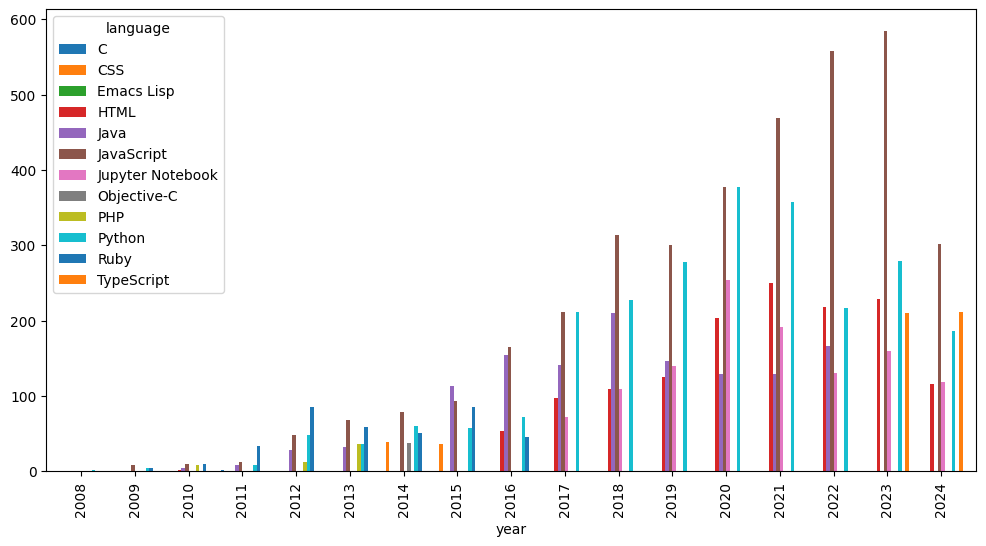

In [145]:
repo_data['created_at']=pd.to_datetime(repo_data['created_at'])
repo_data['year']=repo_data['created_at'].apply(lambda x:x.year)
language_counts = repo_data.groupby(['year', 'language']).size().reset_index(name='count')
top_languages = (language_counts.sort_values(['year', 'count'], ascending=[True, False])
                                      .groupby('year')
                                      .head(5))
import matplotlib.pyplot as plt
pivot_df = top_languages.pivot(index='year', columns='language', values='count').fillna(0)

    # Plotting
pivot_df.plot(kind='bar', figsize=(12, 6),width=0.8)
grouped=top_languages.groupby('year')
for year, group in grouped:
        print(f"Top languages in {year}:")
        for index, row in group.iterrows():
            print(f"  {row['language']}: {row['count']} repositories")


In [146]:
users_data

,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at,leader_strength,bio_len
0,Premalatha-success,Premalatha T,AI CONSULTANT/DATA SCIENTIST/TRAINER/FREELANCE...,Chennai,NaN,NaN,Data Science Fanatic,137,2035,1,2020-01-13T14:41:16Z,1017.500000,3
1,anitaa1990,Anitaa Murthy,NaN,Chennai,murthyanitaa@gmail.com,True,Android Developer/iOS Developer,38,1945,12,2016-10-04T05:03:44Z,149.615385,3
2,codewithMUHILAN,ＭＵＨＩＬＡＮ,NaN,"chennai, india",NaN,NaN,Love with my Passion...❤️,5,1838,0,2023-07-10T05:30:12Z,1838.000000,4
3,sygops,SYGK,NaN,Chennai,sygops@gmail.com,NaN,Do what you feel in your heart to be right. Yo...,113,1815,10219,2015-12-30T12:32:19Z,0.177593,14
4,Spikeysanju,Sanju S,THISUXHQ,"Chennai, India",spikeysanju98@gmail.com,True,Designer Founder @THISUXHQ | Google Developer ...,65,1297,24,2016-11-11T11:33:06Z,51.880000,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,RAJAGOPALAN-GANGADHARAN,Rajagopalan Gangadharan,AMAZON,Chennai,g.raju2000@gmail.com,True,Learning to swim in the ocean of open source :),51,51,20,2017-06-09T06:20:05Z,2.428571,10
419,sathishmepco,Sathish Kumar,ZOHO CORP,Chennai,sathishmepco@gmail.com,NaN,Android and Java developer,29,51,3,2013-10-15T09:19:30Z,12.750000,4
420,ShauryaBhandari,Shaurya Bhandari,"MCCARTHY LAB, NEXTECH","Chennai, Delhi - India",shauryabhandari25@gmail.com,NaN,Full Stack | ML Enthusiast | McCarthy Lab | GS...,41,51,0,2018-08-20T10:26:39Z,51.000000,25
421,GunjanMA,Gunjan Agrawal,NaN,"Chennai, India",NaN,True,CSE undergraduate student at VIT Chennai campus,17,51,101,2019-06-10T06:13:13Z,0.500000,7
